### MA3402 Estadística
## Tarea 1, Entrega 3: Estimadores de máxima verosimilitud.

**Profesor:** Joaquín Fontbona T.

**Auxiliares:** Fabián A. Ulloa, Claudio López y Catalina Lizana.

## Unos escarabajitos

Para un estudio de un nuevo pesticida en la industria agrícola, se decidió probar la toxicidad de la sustancia química, exponiendo a escarabajos a diferentes concentraciones de la sustancia. Los datos asociados a estos experimentos vienen dados en el archivo $\texttt{datos\_pesticida.csv}$.

Este archivo contiene una tabla, donde la variable $\texttt{nExpuestos}$ es el número de escarabajos expuestos a la concentración correspondiente de pesticida y  $\texttt{nMuertos}$ es el número de escarabajos que efectivamente murieron bajo dicha concentración.

Nos interesará generar un modelo probabilístico con el que podamos estudiar la _efectividad_ de nuestro pesticida, es decir, qué tan probable es que se mate a la plaga dada una cierta concentración de la sustancia.

Más específicamente, sea $Y$ la variable aleatoria binaria que vale $Y=1$ si un escarabajo muere bajo la concentración $x$ de sustancia, y vale $Y=0$ si no es así. Definimos $\pi(x) = \mathbb{P}(Y=1 | x)$, y nos interesará _estimar_ la forma de esta función, considerando los datos obtenidos de los experimentos.



**1.-** Lea el archivo $\texttt{datos\_pesticida.csv}$ y genere una columna llamada $\texttt{efectividad}$, en que se guarde, para cada valor de la concentración, qué tan efectivo fue el pesticida (i.e. cuántos escarabajos murieron del total que fue expuesto). Grafique la _efectividad_ en función de la _concentración_ de la sustancia (le podrá ser útil la función de ploteo definida aquí abajo).

In [3]:
#hay que importar en los archivos del google colab el archivo .csv bajo el nombre datos_pesticida
data <- read.csv("datos_pesticida.csv")  #aqui se almacena como data frame
# data #se puede descomentar para observar el dataframe

In [4]:
#para crear una columna se llama al dataframe y se usa la función $ seguido del nombre de la nueva columna
#para acceder a columnas ya registradas, se hace lo mismo
data$efectividad <- data$nMuertos/data$nExpuestos
#la efectividad se calcula de esta forma por la proporcion nMuertos : nExpuestos = incognita : 1
# data #se puede descomentar para observar el dataframe actualizado

In [5]:
# Instalémos ggplot2 en caso de que no la tengamos
if(!(require(ggplot2))){install.packages('ggplot2')}
library(ggplot2)

Loading required package: ggplot2



In [6]:
# Función para plotear
lineas <- function(df, colx, coly){
    pp <- ggplot(data=df, aes(x=!!sym(colx), y=!!sym(coly))) +
    geom_line() +
    geom_smooth() + #para ver una gráfica más suavizada
    geom_point() +
    labs(
        title='Efectividad (empírica) de la sustancia en función de la concentración',
        x = "Concentración",
        y = "Efectividad"
    )
    return(pp);
}

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


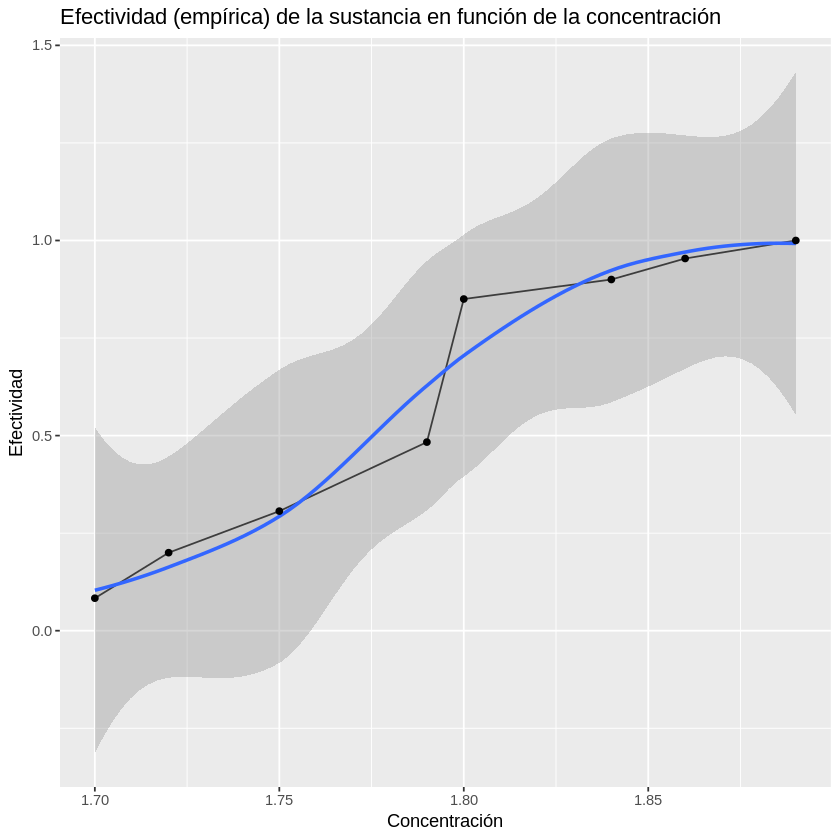

In [7]:
#para graficar se utiliza la funcion dada, donde se le entrega el data frmae y el string con los nombres
# de las variables independiente y dependiente, respectivamente
concentracion_efectividad <- lineas(data, 'concentracion', 'efectividad')
concentracion_efectividad

Del gráfico se observa que la efectividad aumenta en la medida que la concentración del pesticida lo hace.

Note que este gráfico pareciera tener una forma de "S" (algo así como una sigmoide); por lo que tiene sentido pensar que hay un modelo _subyacente_ que nos podría permitir entender la relación entre la concentración y la _efectividad_ de forma "continua".

En particular, utilizaremos tres modelos diferentes para estimar la influencia de la toxicidad en la probabilidad de que un escarabajo se muera bajo una determinada concentración $x$ de sustancia:

- La probabilidad depende de la concentración a través de una función logística (de parámetros $\alpha_1, \beta_1$ por determinar):

$$\tilde{\pi}(x) = \frac{\exp(\alpha_1 + \beta_1 x)}{1 + \exp(\alpha_1 + \beta_1 x)} = \frac{e^{\alpha_1 + \beta_1 x}}{1 + e^{\alpha_1 + \beta_1 x}} \cdot \frac{e^{-(\alpha_1 + \beta_1 x)}}{e^{-(\alpha_1 + \beta_1 x)}} = \frac{1}{1 + e^{-(\alpha_1 + \beta_1 x)}}$$

(notar que justamente tiene la forma de una sigmoidea)

- La probabilidad depende de $x$ a través de la función _probit_ (con parámetros $\alpha_2, \beta_2$ por determinar). Es decir, si $\Phi$ es la función de **distribución** de una normal estándar (i.e. la integral de la densidad de la normal estándar), consideramos:
$$\hat{\pi}(x) = \Phi(\alpha_2 + \beta_2 x) = \displaystyle \int_{-\infty}^{\alpha_2 + \beta_2 x} \dfrac{1}{\sqrt{2\pi}} e^{-\frac{1}{2}s^{2}} \, ds$$

- La probabilidad depende de $x$ a través de la función log-log complementaria (con parámetros $\alpha_3, \beta_3$ por determinar):

$$\bar{\pi}(x) = 1 - \exp(-\exp(\alpha_3 + \beta_3 x)) = 1-e^{-e^{\alpha_3 + \beta_3 x}}$$


Para su comodidad, aquí definimos las funciones que intervendrán en este ejercicio:

In [8]:
logistic <- function(alfa1, beta1, x){
  exp(alfa1 + beta1*x) / (1 + exp(alfa1 + beta1*x))
}

probit <- function(alfa2, beta2, x){
  Vectorize(pnorm)(alfa2 + beta2*x,0,1)
}

loglog <- function(alfa3, beta3, x){
  1 - exp(-exp(alfa3 + beta3*x))
}

**2.-** Sin realizar ningún cálculo, escoja algunos valores de $\alpha_i$ y $\beta_i$ (para $i = 1, 2,3$) arbitrariamente. Grafique, en una misma figura, las funciones $\bar{\pi}, \tilde{\pi}, \hat{\pi}$ y la curva de _efectividad vs. concentración_ de antes. Intente que su elección de valores para $\alpha_i$ y $\beta_i$ sea tal que todas las curvas "se parezcan".

_Hint: Averigüe sobre la función $\texttt{geom\_function}$ de ggplot_

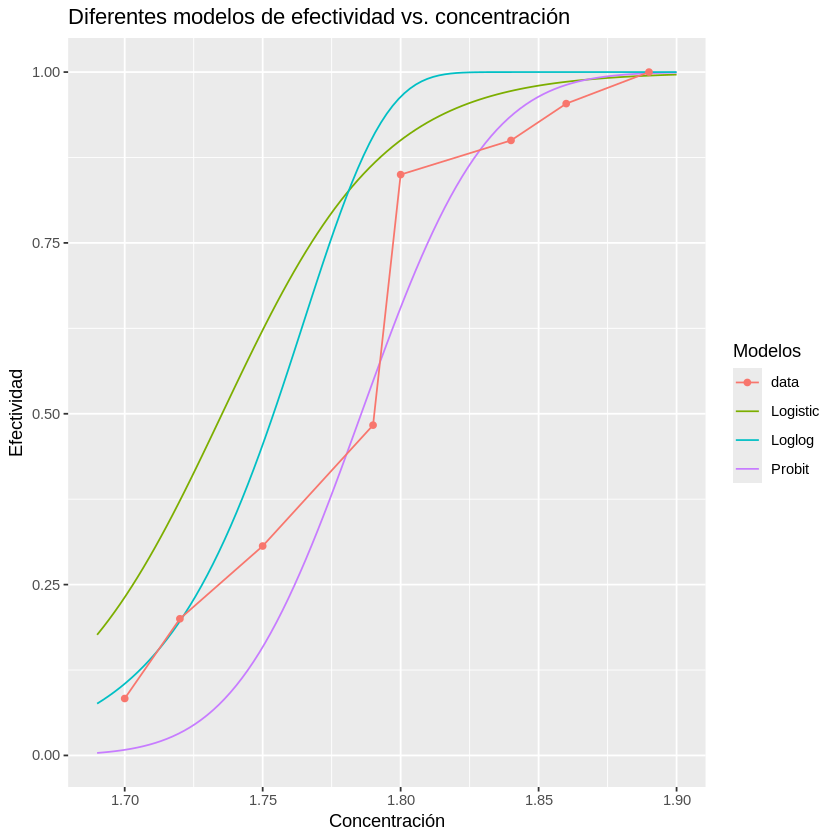

In [9]:
# Respuesta
#a continuación se declaran los valores escogidos para alpha_i, beta_i
#para logistic
alpha_1 <- -59
beta_1 <- 34

#para probit
#como es una funcion de probabilidad acumulada, cuando el limite superior crece, tiende a integrar 1
#para limites superiores menores, no tiende a integrar 1
alpha_2 <- -50
beta_2 <- 28

#para loglog
#como es una función cuya variable está dentro de la exponencial de una exponencial, es necesario que tome
# valores pequeños (pues la primera exponencial los aumentará) tales que la última exponencial los aumente no hasta infinito
alpha_3 <- -60
beta_3 <- 34

#para graficar
ggplot(data, aes(x = concentracion, y = efectividad)) + #se crea entorno de ggplot y se instancian los valores a graficar
  xlim(c(1.69,1.90)) +  #se definen los limites donde se quiere la gráfica
  geom_function(fun=logistic, aes(colour='Logistic'), alpha=1, args=list(alfa1=alpha_1, beta1=beta_1)) + #logistic
  geom_function(fun=probit, aes(colour='Probit'), alpha=1, args=list(alfa2=alpha_2, beta2=beta_2)) + #probit
  geom_function(fun=loglog, aes(colour='Loglog'), alpha=1, args=list(alfa3=alpha_3, beta3=beta_3)) + #loglog
  geom_line(aes(color = 'data')) + geom_point(aes(color = 'data')) + #datos empiricos, linea y puntos
  labs(title = 'Diferentes modelos de efectividad vs. concentración', x = 'Concentración', y = 'Efectividad', color='Modelos') #se añaden titulos


**3.-** Recuerde la definición de _verosimilitud_ de un parámetro dada una muestra aleatoria.

**Respuesta:** Corresponde a la función $\mathcal{L}((Y_{i})_{i=1}^{n}; \pi(x))$ donde $(Y_{i})_{i=1}^{n}$ es la m.a.s. de los eventos y $\pi(x)$ el parámetro que se busca estimar. El objetivo es maximizar esta función pues el $\text{argmax}$ entregará el estimador de máxima verosimilitud, y la función se define por la densidad de probabilidad conjunta $f_{Y_{1}, ..., Y_{n}}(y_{1}, ..., y_{n}; \pi(x))$ que por independencia de la m.a.s. es el producto de la densidad de distribución de una (que es idéntica al resto) $\displaystyle \prod_{i=1}^{n} f_{Y_{i}}(y_{i})$.

Sólo para clarificar, en nuestro caso, la tabla trae _varios experimentos agrupados_ según el nivel de concentración. Para cada valor de la concentración, se realizaron $\texttt{nExpuestos}$ experimentos, de los cuales $\texttt{nMuertos}$ corresponden a aquellos en que la v.a. vale $Y=1$ (i.e. el escarabajo murió).

**4.-** Escriba la forma _general_ de la verosimilitud y log-verosimilitud para este problema de _clasificación binaria_. Para cada uno de los modelos propuestos, genere una función de R que calcule la log-verosimilitud de un modelo a partir de los datos contenidos en el archivo.

**Respuesta:** El parámetro a estimar es la función de probabilidad $\pi(x) = \mathbb{P}(Y=1 | x)$ que busca estudiar la probabilidad de que murió un escarabajo dado que se tiene una concentración.

Para calcular la verosimilitud general de este problema de clasificación binaria, hay que determinar la función de densidad de probabilidad de cada realización.

Notando que en el modelo de estudio, cada $Y_{i}$ distribuye como una Bernoulli de parámetro $\pi(x_{i})$ (modelandolo como un vector booleano de 0 y 1 con tantos 1 como muertos hubo, y tantas entradas como expuestos hayan habido), al tener las $n$ realizaciones de los experimentos, en cada uno en particular hay dos posibilidades: muere un escarabajo con probabilidad $\pi(x_{i})$ o no muere con probabilidad del complemento i.e. $1-\pi(x_{i})$. Así, en una realización, se tiene la probabilidad $\pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{1-y_{i}}$ y como la m.a.s. es i.i.d., considerando todas las realizaciones y la definición de verosimilitud, se tiene:

\begin{align*}
\mathcal{L}((Y_{i})_{i=1}^{n}; \pi(x_{i})) &= \displaystyle \prod_{i=1}^{n} \pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{1-y_{i}}.
\end{align*}


Luego, la log verosimilitud corresponde a:

\begin{align*}
l\left(\pi(x)\right) &:= \ln\left(\mathcal{L}((Y_{i})_{i=1}^{n}; \pi(x_{i}))\right)\\
&= \ln\left(\displaystyle \prod_{i=1}^{n} \pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{1-y_{i}}\right)\\
&= \displaystyle \sum_{i=1}^{n} \ln \left( \pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{1-y_{i}}\right)\\
&= \displaystyle \sum_{i=1}^{n} y_{i} \ln\left(\pi(x_{i})\right) + (1-y_{i}) \ln \left(1-\pi(x_{i})\right)
\end{align*}

que se obtiene usando propiedades conocidas del logaritmo natural.




In [11]:
# #Respuesta #exponente 1-y en el complemento

# #función de log-verosimilitud para la función logistic: parámetro alfa, parámetro beta, concentraciones, muertos
# logver_logistic <- function(alpha_1, beta_1, x, y){
#   pi_x <- logistic(alpha_1, beta_1, x)
#   sum1 <- y*log(pi_x)
#   sum2 <- (1-y)*log(1-pi_x)
#   logver_logistic_pi <- sum(sum1 + sum2)
#   return(logver_logistic_pi)
# }

# #función de log-verosimilitud para la función probit: parámetro alfa, parámetro beta, concentraciones, muertos
# logver_probit <- function(alpha_2, beta_2, x, y){
#   pi_x <- probit(alpha_2, beta_2, x)
#   sum1 <- y*log(pi_x)
#   sum2 <- (1-y)*log(1-pi_x)
#   logver_probit_pi <- sum(sum1 + sum2)
#   return(logver_probit_pi)
# }

# #función de log-verosimilitud para la función loglog: parámetro alfa, parámetro beta, concentraciones, muertos
# logver_loglog <- function(alpha_3, beta_3, x, y){
#   pi_x <- loglog(alpha_3, beta_3, x)
#   sum1 <- y*log(pi_x)
#   sum2 <- (1-y)*log(1-pi_x)
#   logver_loglog_pi <- sum(sum1 + sum2)
#   return(logver_loglog_pi)
# }

Otro planteamiento es el siguiente: se sabe que $\pi(x)$ es la probabilidad de que muera un escarabajo; luego, dado que se hicieron $\texttt{nExpuestos}$ experimentos (las realizaciones de $Y_{i}$), entonces se sabe que la cantidad de casos desfavorables (no mueren) es los que fueron expuestos y no murieron. Combinando con lo anterior:
\begin{align*}
\mathcal{L}((Y_{i})_{i=1}^{n}; \pi(x_{i})) &= \displaystyle \prod_{i=1}^{n} \pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{\text{#expuestos}-y_{i}}.
\end{align*}


Luego, la log verosimilitud corresponde a:

\begin{align*}
l\left(\pi(x)\right) &:= \ln\left(\mathcal{L}((Y_{i})_{i=1}^{n}; \pi(x_{i}))\right)\\
&= \ln\left(\displaystyle \prod_{i=1}^{n} \pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{\text{#expuestos}-y_{i}}\right)\\
&= \displaystyle \sum_{i=1}^{n} \ln \left( \pi(x_{i})^{y_{i}}(1-\pi(x_{i}))^{\text{#expuestos}-y_{i}}\right)\\
&= \displaystyle \sum_{i=1}^{n} y_{i} \ln\left(\pi(x_{i})\right) + (\text{#expuestos}-y_{i}) \ln \left(1-\pi(x_{i})\right)
\end{align*}


El que sea más adecuado se seguirá reflexionando para las siguientes entregas.

In [12]:
#Respuesta #exponente n-y en el complemento

#función de log-verosimilitud para la función logistic: parámetro alfa, parámetro beta, concentraciones, muertos
logver_logistic <- function(alpha_1, beta_1, x, y, n){
  pi_x <- logistic(alpha_1, beta_1, x)
  sum1 <- y*log(pi_x)
  sum2 <- (n-y)*log(1-pi_x)
  logver_logistic_pi <- sum(sum1 + sum2)
  return(logver_logistic_pi)
}

#función de log-verosimilitud para la función probit: parámetro alfa, parámetro beta, concentraciones, muertos
logver_probit <- function(alpha_2, beta_2, x, y){
  pi_x <- probit(alpha_2, beta_2, x)
  sum1 <- y*log(pi_x)
  sum2 <- (n-y)*log(1-pi_x)
  logver_probit_pi <- sum(sum1 + sum2)
  return(logver_probit_pi)
}

#función de log-verosimilitud para la función loglog: parámetro alfa, parámetro beta, concentraciones, muertos
logver_loglog <- function(alpha_3, beta_3, x, y){
  pi_x <- loglog(alpha_3, beta_3, x)
  sum1 <- y*log(pi_x)
  sum2 <- (n-y)*log(1-pi_x)
  logver_loglog_pi <- sum(sum1 + sum2)
  return(logver_loglog_pi)
}

**5.-** Encuentre los estimadores de Máxima Verosimilitud para los parámetros $(\alpha_i, \beta_i)$ con $i = 1, 2, 3$ utilizando una función de optimización genérica de R (por ejemplo, la función $\texttt{optim}$). Repita el gráfico de la pregunta **2.-** pero ahora empleando los valores _óptimos_ de los parámetros. ¿Qué puede decir al respecto?

[1] -59.84617  33.78353

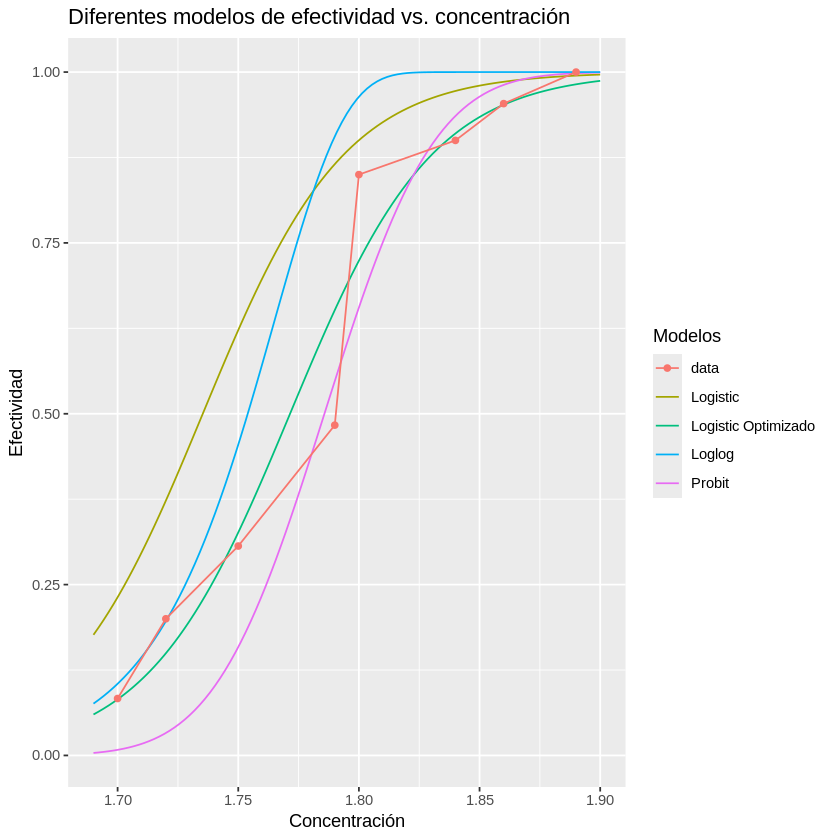

In [13]:
#como se va a usar el modelo logistic, hay que ajustar la función para usar optim,
#ya que por defecto minimiza así que hay que pasarle la función con signo negativo para que maximice
#y además debe recibir los parámetros alfa1, beta1 en una misma variable
opt_logver_logistic <- function(params, x, y, n){
  alpha_1 <- params[1]
  beta_1 <- params[2]
  pi_x <- logistic(alpha_1, beta_1, x)
  sum1 <- y*log(pi_x)
  sum2 <- (n-y)*log(1-pi_x)
  logver_logistic_pi <- -sum(sum1 + sum2) #aqui se añade el signo menos
  return(logver_logistic_pi)
}

#se extraen las columnas a utilizar del dataframe
x <- data$concentracion
y <- data$nMuertos
n <- data$nExpuestos

#se optimiza entregando puntos de partida, la funcion a maximizar y los valores
opt_logistic <- optim(par=c(-1,1), fn=opt_logver_logistic, x=x, y=y, n=n)
alpha_logistic <- opt_logistic$par[1]
beta_logistic <- opt_logistic$par[2]
opt_logistic$par

#se grafica
ggplot(data, aes(x = concentracion, y = efectividad)) + #se crea entorno de ggplot y se instancian los valores a graficar
  xlim(c(1.69,1.90)) +  #se definen los limites donde se quiere la gráfica
  geom_function(fun=logistic, aes(colour='Logistic'), alpha=1, args=list(alfa1=alpha_1, beta1=beta_1)) + #logistic
  geom_function(fun=logistic, aes(colour='Logistic Optimizado'), alpha=1, args=list(alfa1=alpha_logistic, beta1=beta_logistic)) + #logistic optimizado
  geom_function(fun=probit, aes(colour='Probit'), alpha=1, args=list(alfa2=alpha_2, beta2=beta_2)) + #probit
  geom_function(fun=loglog, aes(colour='Loglog'), alpha=1, args=list(alfa3=alpha_3, beta3=beta_3)) + #loglog
  geom_line(aes(color = 'data')) + geom_point(aes(color = 'data')) + #datos empiricos, linea y puntos
  labs(title = 'Diferentes modelos de efectividad vs. concentración', x = 'Concentración', y = 'Efectividad', color='Modelos') #se añaden titulos

Teóricamente, determinamos los estimadores de máxima verosimilitud $\hat{\alpha}_{i}$ y $\hat{\beta}_{i}$, para $i=1,2,3$. Al reemplazar estos valores para los tres modelos dados (que buscan estimar la probabilidad $\pi(x)$), las curvas de estos modelos deberían coincidir. Por otro lado, se esperaría que a medida que la concentración de veneno $x$ aumenta, la probabilidad de que un escarabajo muera tienda a 1. Vemos que, en contraste con los gráficos de la parte 2, los gráficos con los parámetros estimados sí ilustran estos eventos.

**6.-** Considere ahora el método de los _momentos_. Asuma que es suficiente considerar, para un valor de $x$ fijo, la esperanza de $Y$ dado ese valor de $x$ para encontrar unos "buenos" parámetros a través del método de los momentos. Elija alguno de los 3 modelos a su gusto y estime un valor pertinente de los parámetros utilizando este "método de los momentos". Compare los resultados obtenidos con respecto al EMV ¿Cuál preferiría usar?.

_Hint: Considere, para un par de $x$ fijos bien elegidos, el valor de la esperanza, y con ello estime los parámetros_

Siguiendo la indicación, se tomarán $x_{i}$ y $x_{j}$ fijos (se estudiarán solo 2 filas del data frame); para elegirlos adecuadamente, la clave es que no sean consecutivos para así obtener algo más representativo. Se llamarán $N$ y $m$ a la cantidad de expuestos y muertos, respectivamente, y se utilizará el subíndice $i$ y $j$ para referirse a cada una cuando corresponda; así $\dfrac{m}{N}$ corresponderá a la efectividad buscada.

Se quiere entonces que los datos teóricos se parezcan a los datos empíricos:
$$\mathbb{E}(Y_{i} \mid x_{i}) \approx \dfrac{m_{i}}{N_{i}} \,\, \wedge  \,\, \mathbb{E}(Y_{j} \mid x_{j}) \approx \dfrac{m_{j}}{N_{j}} $$

Pero cada $Y$ distribuye como una Bernoulli de parámetro $\pi(x)$, así que su esperanza dada una concentración fija será justamente el parámetro (por definición). Pero en este caso el parámetro se sigue según el modelo Logistic, así que:
$$\tilde{\pi}(x_{i}) \approx \dfrac{m_{i}}{N_{i}} \,\, \wedge  \,\, \tilde{\pi}(x_{j}) \approx \dfrac{m_{j}}{N_{j}}$$

Usando la definición, queda:
$$\dfrac{1}{1+e^{-(\alpha_{1} + \beta_{1} x_{i})}} \approx \dfrac{m_{i}}{N_{i}} \,\, \wedge  \,\, \dfrac{1}{1+e^{-(\alpha_{1} + \beta_{1} x_{j})}} \approx \dfrac{m_{j}}{N_{j}}$$

Donde se puede despejar de manera genérica:
\begin{align*}
& \implies \dfrac{1}{1+e^{-(\alpha_{1} + \beta_{1} x)}} = \dfrac{m}{N}\\
&\iff N = m \left( 1+e^{-(\alpha_{1} + \beta_{1} x)} \right)\\
&\iff \dfrac{N-m}{m} = e^{-(\alpha_{1} + \beta_{1} x)} \\
&\implies \ln \left(\dfrac{N-m}{m}\right) = -(\alpha_{1} + \beta_{1} x) \\
&\implies \ln \left(\dfrac{m}{N-m}\right) = \alpha_{1} + \beta_{1} x
\end{align*}

Luego se tienen las ecuaciones (1) y (2) de a continuación:
$$\ln \left(\dfrac{m_{i}}{N_{i}-m_{i}}\right) = \alpha_{1} + \beta_{1} x_{i} \,\, \wedge \,\, \ln \left(\dfrac{m_{j}}{N_{j}-m_{j}}\right) = \alpha_{1} + \beta_{1} x_{j}$$

Despejando $\beta_{1}$ de (2) - (1):
\begin{align*}
&\implies \beta_{1}(x_{i}-x_{j}) = \ln \left(\dfrac{m_{i}}{N_{i} - m_{i}} \cdot \dfrac{N_{j} - m_{j}}{m_{j}}\right) \\
&\implies \beta_{1} = \dfrac{1}{x_{i}-x_{j}}\ln \left(\dfrac{m_{i}(N_{j} - m_{j})}{(N_{i} - m_{i})m_{j}}\right)
\end{align*}

Luego, usando eso en (2) se despeja $\alpha_{1}$:
$$\alpha_{1} = \ln \left(\dfrac{m_{j}}{N_{j} - m_{j}}\right) - \dfrac{x_{j}}{x_{i}-x_{j}}\ln \left(\dfrac{m_{i}(N_{j} - m_{j})}{(N_{i} - m_{i})m_{j}}\right)$$


In [15]:
# Respuesta

#Para x_1,x_2 fijos, consideramos E(Y(x_1)) y E(Y(x_2))

i=2
x_i = data[i, 1] #concentracion
N_i = data[i, 2] #expuestos
m_i = data[i, 3] #muertos

j = 6
x_j = data[j, 1] #concentracion
N_j = data[j, 2] #expuestos
m_j = data[j, 3] #muertos

beta_momentos = 1/(x_i - x_j)*log((m_i*(N_j - m_j))/((N_i - m_i)*m_j))
alpha_momentos = log(m_j/(N_j - m_j)) - beta_momentos*x_j
alpha_momentos
beta_momentos

[1] -52.75007

[1] 29.86266

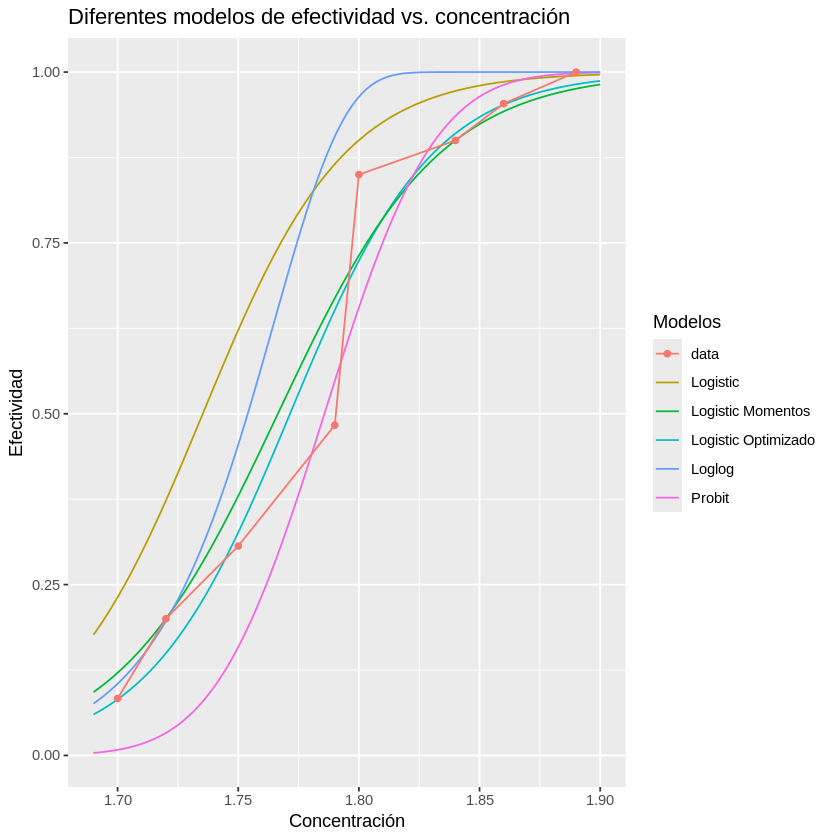

In [16]:
#se grafica
ggplot(data, aes(x = concentracion, y = efectividad)) + #se crea entorno de ggplot y se instancian los valores a graficar
  xlim(c(1.69,1.90)) +  #se definen los limites donde se quiere la gráfica
  geom_function(fun=logistic, aes(colour='Logistic'), alpha=1, args=list(alfa1=alpha_1, beta1=beta_1)) + #logistic
  geom_function(fun=logistic, aes(colour='Logistic Optimizado'), alpha=1, args=list(alfa1=alpha_logistic, beta1=beta_logistic)) + #logistic optimizado
  geom_function(fun=logistic, aes(colour='Logistic Momentos'), alpha=1, args=list(alfa1=alpha_momentos, beta1=beta_momentos)) + #logistic con parametros de metodo de momentos
  geom_function(fun=probit, aes(colour='Probit'), alpha=1, args=list(alfa2=alpha_2, beta2=beta_2)) + #probit
  geom_function(fun=loglog, aes(colour='Loglog'), alpha=1, args=list(alfa3=alpha_3, beta3=beta_3)) + #loglog
  geom_line(aes(color = 'data')) + geom_point(aes(color = 'data')) + #datos empiricos, linea y puntos
  labs(title = 'Diferentes modelos de efectividad vs. concentración', x = 'Concentración', y = 'Efectividad', color='Modelos') #se añaden titulos

* **Método de momentos**:
  - Ventajas: Hay menos restricciones para encontrar la respuesta (i.e. los parámetros adecuados); puede entregar resultados muy acertados (siempre que los puntos sean adecuados).
  - Desventajas: Hay que resolver un sistema de ecuaciones de tantas ecuaciones como parámetros tenga el estimador; está sujeto a que los puntos elegidos sean adecuados. (Por ejemplo, se puede intentar con filas consecutivas y los resultados no se ajustan con los datos empíricos).


* **Método de máxima verosimilitud**:
  - Ventajas: Entrega los óptimos directamente.
  - Desventajas: La función que se quiere optimizar podría no ser cóncava y en tal caso no se podría hallar jamás un máximo; hay que modelar la distribución de la variable aleatoria.

Se prefiere utilizar el Método de momentos ya que se puede visualizar el comportamiento de los datos y es más cómodo aproximarlos por la forma que propone el método, mientras que EMV está sujeto a modelar el comportamiento, que en otros casos podría no ser tan directo.


Toda la idea detrás de _estimar_ el parámetro que permita _explicar el comportamiento observado_ de la mejor manera posible, es que ahora disponemos de un modelo _probabilístico_ que podemos estudiar, y del cual podemos _samplear_ nuevos datos sin problemas



**7.-** Elija alguno de los parámetros _óptimos_ obtenidos en alguna de las preguntas anteriores (el que le parezca mejor) y en esta pregunta buscaremos _samplear_ "nuevas muestras" para interpolar nuestra curva de efectividad vs. concentración a nuevos valores de concentraciones. Para ello:

- Samplee $n=100$ uniformes entre 1.7 y 1.9 que representarán la concentración de la sustancia. Estas las llamaremos $\{x_k\}_{k=1}^{100}$. Para cada una de ellas, calcule $\pi_{\theta^*}(x_k) = \mathbb{P}(Y=1|x_k)$ utilizando su modelo preferido (con el parámetro _óptimo_ $\theta^* = (\alpha^{*}_i, \beta^{*}_i)$ que decidió al inicio de la pregunta). Estos serán los "nuevos puntos" en los que podremos entender el comportamiento de nuestro pesticida.

- Para cada uno de estos "nuevos puntos", samplee una bernoulli de parámetro $\pi_{\theta^*}(x_k)$ (esta corresponde a la v.a. $Y$ que determina si un escarabajo vive o no). Con esto hemos _simulado_ un nuevo experimento, asumiendo que nuestro modelo es correcto.

- Guarde en un data.frame los valores de las "nuevas concentraciones", así como de los $\texttt{nExpuestos}$, $\texttt{nMuertos}$ y $\texttt{efectividad}$ que obtuvo en los _experimentos simulados_.

- Grafique la nueva curva de "efectividad según la concentración" para los experimentos simulados. En ese mismo gráfico incluya las curvas correspondientes a $\pi_\theta(x)$ para los otros modelos (i.e. los que NO eligió para _simular_ los experimentos), así como la curva de efectividad vs. concentración original. Comente sus resultados.


In [17]:
#Respuesta
n <- 100; N<-100
x <- runif(n, 1.7,1.9) #nuevas concentraciones
p <- logistic(alpha_logistic, beta_logistic, x) #nuevos parametros, calcular el parametro para las concentraciones con los valores optimos
e <- rep(n, N) #nuevos expuestos (siempre son 100)
m <- rbinom(N, e, prob=p) #nuevos muertos simulados, se samplea una bernoulli de parametro pi(x_i*)
exp <- data.frame(concentracion_nueva=x, nExpuestos_nuevo=e, nMuertos_nuevo=m) #se guarda el experimento
ef <- exp$nMuertos_nuevo/exp$nExpuestos_nuevo #se calcula nuve aefectividad
exp$efectividad_nueva <- ef #se añade al data.frame

# exp #para checar el dataframe

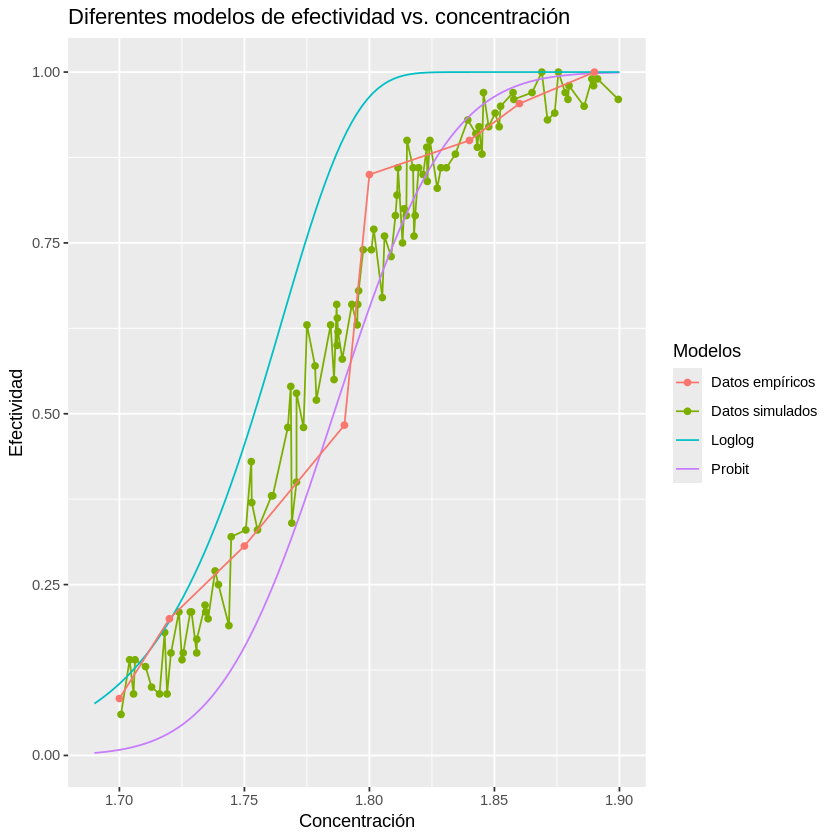

In [18]:
#se grafica
ggplot() + #se crea entorno de ggplot
  xlim(c(1.69,1.90)) +  #se definen los limites donde se quiere la gráfica
  geom_point(data=exp, aes(x=concentracion_nueva, y=efectividad_nueva, colour='Datos simulados')) + #datos simulados linea continua
  geom_line(data=exp, aes(x=concentracion_nueva, y=efectividad_nueva, colour='Datos simulados')) + #datos simulados puntitos
  geom_function(fun=probit, aes(colour='Probit'), alpha=1, args=list(alfa2=alpha_2, beta2=beta_2)) + #probit
  geom_function(fun=loglog, aes(colour='Loglog'), alpha=1, args=list(alfa3=alpha_3, beta3=beta_3)) + #loglog
  geom_line(data=data, aes(x=concentracion, y=efectividad, colour='Datos empíricos')) + #datos empiricos linea continua
  geom_point(data=data, aes(x=concentracion, y=efectividad, colour='Datos empíricos')) + #datos empiricos puntitos
  labs(title = 'Diferentes modelos de efectividad vs. concentración', x = 'Concentración', y = 'Efectividad', color='Modelos') #se añaden titulos

Se observa que, en general, los modelos siguen un comportamiento sigmoide (crece exponencialmente y tiende a una constante). En particular, los datos simulados son similares a los datos empíricos, lo cual se verifica porque intersecta o atraviesa en varios puntos a la curva descrita por los datos empíricos; esto es esperable, dado que se simuló con un estimador óptimo del parámetro. También, los otros modelos para aproximar el parámetro difieren dependiendo de los valores de $\alpha$ y $\beta$ que se seleccionen, esto se verifica porque pocas veces coinciden con los datos empíricos, y es coherente porque no se optimizaron.

**8.-** Hemos visto que los 3 modelos permiten _explicar_ relativamente bien las observaciones ¿Cuál podría ser una buena estrategia para determinar cuál de los tres modelos se ajusta mejor a las observaciones realizadas? ¿Con cuál se quedarían ustedes?

Teóricamente, nos gustaría determinar el sesgo de cada modelo con respecto a los datos empíricos. Como ya trabajamos con la función de log-verosimilitud, y sabemos que la cota de Cramer Rao establece que la precisión de un modelo es por lo menos su información de Fisher, una estrategia para determinar cuál de los tres modelos se ajusta mejor a la muestra empírica es sencillamente determinando sus respectivas informaciones de Fisher.
Otra estrategia (más informal), es sencillamente visualizar qué modelo se ajusta más a los datos empíricos; por ejemplo, si su curva intersecta con éstos, pues esto es un indicio de que la simulación en efecto modela la muestra.


Otra estrategia (más informal y rápida), es sencillamente visualizar en los gráficos cual de los modelos se ajusta más a los datos empíricos, en particular utilizando el criterio de cual curva intersecta más veces a los datos empíricos, pues esto es un buen indicio de que la simulación en efecto se ajusta a la muestra, considerando que si siempre intersecta las curvas son iguales.

**Respuesta:**


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6f986ec-9e66-400a-833c-32ff350ef670' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>